## 4장 모델훈련
> - 머신러닝 모델과 훈련 알고리즘이 어떻게 작동되는지 이해하고 있으면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼 파라미터를 찾을 수 있다.

## 4. 선형 회귀
![test](./img/선형회귀.jpg)

- 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다.

![test](./img/mse.png)

- 가장 널리 사용되는 성능 측정 지표는 평균제곱오차(MSE)이다.

## 4.1.1 정규방정식
- 비용 함수를 최소화하는 W(가중치 파라미터)값을 찾기 위한 해석적인 방법은 정규방정식이다.

![test](./img/정규방정식.jpg)

- Θ^는 비용 함수를 최소화하는 Θ 값이다.(즉, W 가중치 파라미터)
- y는 y1 ,...,ym 까지의 타깃 벡터


In [1]:
import numpy as np
import matplotlib as plt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
X = 2*np.random.rand(100,1) # 100X1행렬의 랜덤 값 생성
y = 4 + 3 * X + np.random.randn(100,1) # y = 4+3X+가우시안_노이즈

In [3]:
X_b = np.c_[np.ones((100,1)),X] # 랜덤 행렬에 X0에 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규방정식
# linalg.inv() 선형대수 모듈의 역행렬 함수 

In [5]:
theta_best # 노이즈 때문에 원래 함수의 파라미터를 정확하게 재현을 못함 (편향)

array([[4.02540813],
       [3.14984754]])

- 이 데이터를 생성하기 위해 사용한 실제 함수는 y = 4 + 3x1 + 가우시안_노이즈이다.
- 정규방정식으로 계산한 결과 W0 = 4.02, W1 = 3.14으로 원래의 함수식 W0 = 4와 W1 = 3을 기대했지만 노이즈 때문에 원래 함수의 파라미터를 정확하게 구현하지 못 했다.

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #2X2행령
print(X_new_b) #  [[1,0],[1,2]]
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[ 4.02540813],
       [10.3251032 ]])

In [7]:
X_new_b

array([[1., 0.],
       [1., 2.]])

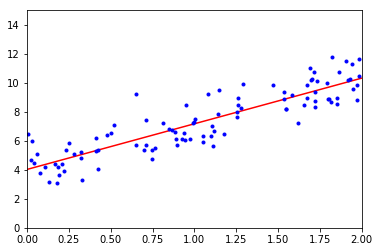

In [8]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

- 정규방정식을 사용하는 사이킷런 코드

In [9]:
from sklearn.linear_model import LinearRegression # 정규방정식

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_ # intercept_ 편향, coef_ 가중치

(array([4.02540813]), array([[3.14984754]]))

In [11]:
lin_reg.predict(X_new) # 결과 값이 같다.

array([[ 4.02540813],
       [10.3251032 ]])

## 4.1.2 계산 복잡도
- 정규방정식은 (n+1)x(n+1) 크기가 되는 X^T x X 의 역행렬을 계산한다. (n의 특성 수) 역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4) ~ O(n3) 사이이다. 
> - 다시말해 특성 수가 두 배로 늘어나면 계산 시간이 2^2.4 = 5.3 ~ 2^3 = 8 배로 증가
> - 따라서 특성 수가 매우 많아지면 정규방정식이 매우 느려진다.
- 다행인 것은 이 공식의 복잡도가 훈련 세트의 샘플 수에는 선형적으로 증가한다.(O(m)).
> - 따라서 메모리 공간이 허락된다면 큰 훈련 세트도 효율적으로 처리할 수 있다.
- 또한 (정규방정식이나 다른 알고리즘으로) 학습된 선형 회귀 모델은 예ㅡㄱ이 매우 빠르다.
> - 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다.
> - 다시말해 예측하려는 샘플이 두 배로 늘어나면(또는 특성이 두  배로 늘어나면) 걸리는 시간도 거의 두 배 증가한다.

## 4.2 경사 하강법
- 경사 하강법(Gradient Descent)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 매우 일반적인 최적화 알고리즘이다.
- 기본적인 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.
> - 그래디언트가 감소하는 방향으로 진행하는데 그래디언트가 0이 되면 최솟값에 도달한 것이다.
- 다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 그어도 곡선을 가로지르지 않는 볼록 함수이다. 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다.
- 또한 연속된 함수이고 기울기가 갑자기 변하지 않습니다.
> - 위 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다.
- 사실 비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다. 
> - 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.
- 모델이 가진 파라미터가 많을수록 이 공간은 차원이 커지고 검색이 더 어려워진다. 300차원의 건초 더미에서 바늘을 찾는 것은 차원이 3개일뿐일 때보다 훨씬 어렵다. 
- 다행히 선형 회귀의 경우 비용 함수가 볼록 함수이기 때문에 이 바늘은 그릇의 맨 아래에 있을 것이다.

## 4.2.1 배치 경사 하강법
- 경사 하강법을 구현하려면 각 모델 파라미터 θ에 대해 비용 함수의 그래디언트를 계산해야한다. 
> - 다시 말해 θ가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 한다. 이를 편도함수라 한다.

![TEST](./img/편도함수.png)

- 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다. 그래서 이 알고리즘을 배치 경사 하강법이라 한다. 즉, 매 스텝에서 훈련 데이터 전체를 사용한다. 이런 이유로 매우 큰 훈련 세트에서는 아주 느리다.
> - 경사 하강법은 특성 수에 민감하지 않다.
> - 따라서 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

![test](./img/스텝.png)



In [19]:
eta = 0.1 # 학습률
n_iterations = 1000 # 반복수
m = 100 # 데이터 수

theta = np.random.randn(2,1) # 랜덤 가중값

for interation in range(n_iterations): # 1000번 반복
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y) # 그래디언트 식
    theta = theta - eta * gradients # 현재의 파라미터 - 학습률*파라미터 미분

In [13]:
theta

array([[4.02540813],
       [3.14984754]])

## 4.2.2 확률적 경사 하강법
- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산한다는 사실이다.
> - 즉, 훈련 세트가 커지면 매우 느려지게 된다.
- 확률적 경사 하강법은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산한다.
> - 매 반복에서 매우 적은 데이터만 처리하기 때문에 알고리즘이 확실히 훨씬 빠르다.
> - 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다.
> - 반면, 확률적(즉, 무작위)이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다.
> - 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소한다.
- 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아니다.
- 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.
> - 위 두가지의 딜레마를 해결하는 한 가지 방법은 학습률을점진적으로 감소시키는 것이다.
> - 시작할 떄는 학습률을 크게하고, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다.

In [31]:
n_epochs = 50 # 50 epchchs 반복
t0, t1 = 5,50 # 학습 스케쥴
m = 100 # 반복 수

def learning_schedule(t): # 인수 t 입력
    return t0 / (t+t1) # 5 / t(인수) + 50

theta = np.random.randn(2,1) # 2행 1열의 정규분포 초기화

for epoch in range(n_epochs): # 50회 반복
    print('---')
    for i in range(m): # 1 epoch 당 100회 반복
        random_index = np.random.randint(m) # 0 ~ 100 사이의 랜덤 값 생성
        xi = X_b[random_index:random_index+1] # X_b = np.c_[np.ones((100,1)),X]
        print(xi) 
        yi = y[random_index:random_index+1]
        print(yi)
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

---
[[1.         1.65385136]]
[[8.4646789]]
[[1.        1.9303978]]
[[10.25500025]]
[[1.         1.80215108]]
[[8.88231819]]
[[1.         0.32044711]]
[[4.84491766]]
[[1.         0.07787208]]
[[3.77815232]]
[[1.         0.99479912]]
[[7.21002736]]
[[1.         1.79437314]]
[[9.97289233]]
[[1.         0.89443122]]
[[5.69871072]]
[[1.         1.27966406]]
[[8.25574845]]
[[1.         0.74900828]]
[[4.71814745]]
[[1.         0.18500832]]
[[4.19660334]]
[[1.         0.89003185]]
[[6.13802602]]
[[1.         0.27944642]]
[[5.07612998]]
[[1.         0.17834743]]
[[3.11631804]]
[[1.         0.93585216]]
[[6.53989014]]
[[1.         1.27966406]]
[[8.25574845]]
[[1.         1.94590562]]
[[9.56599838]]
[[1.         0.65291043]]
[[5.71779199]]
[[1.        0.7667585]]
[[5.51073788]]
[[1.         0.42455507]]
[[5.3353299]]
[[1.         1.28780802]]
[[9.90563875]]
[[1.         1.05106627]]
[[6.34125283]]
[[1.         1.25359461]]
[[7.97442745]]
[[1.         1.11650482]]
[[6.69569031]]
[[1.         1.79

[[1.         1.17731339]]
[[6.45272823]]
[[1.        1.7021617]]
[[10.26507377]]
[[1.        1.9303978]]
[[10.25500025]]
[[1.         1.94168687]]
[[11.2759686]]
[[1.         0.10550374]]
[[4.16091367]]
[[1.         1.53388336]]
[[9.39752997]]
[[1.         0.27944642]]
[[5.07612998]]
[[1.         1.10866146]]
[[5.6293923]]
[[1.         1.25853506]]
[[8.48944069]]
[[1.         0.18500832]]
[[4.19660334]]
[[1.         0.47702322]]
[[6.4148132]]
[[1.         1.80215108]]
[[8.88231819]]
[[1.         1.54626831]]
[[8.18635439]]
[[1.         1.27966406]]
[[8.25574845]]
[[1.         0.99797571]]
[[7.30677819]]
[[1.         1.94590562]]
[[9.56599838]]
[[1.         1.04903745]]
[[5.95095715]]
[[1.         0.41527853]]
[[6.16273151]]
[[1.         0.89003185]]
[[6.13802602]]
[[1.         0.41527853]]
[[6.16273151]]
[[1.         1.94168687]]
[[11.2759686]]
[[1.        0.7667585]]
[[5.51073788]]
[[1.         1.90859737]]
[[11.5224456]]
[[1.         1.69338168]]
[[11.04882177]]
[[1.         0.320285

[[1.         0.21041987]]
[[4.39152104]]
[[1.         1.13863025]]
[[7.84392666]]
[[1.         1.84954452]]
[[8.56125278]]
[[1.         1.53400374]]
[[8.89282489]]
[[1.         1.84954452]]
[[8.56125278]]
[[1.         1.98587294]]
[[10.47488099]]
[[1.         0.52107829]]
[[7.07948584]]
[[1.        0.7667585]]
[[5.51073788]]
[[1.         1.73416965]]
[[10.1273835]]
[[1.         0.16645325]]
[[4.39231161]]
[[1.         1.25853506]]
[[8.48944069]]
[[1.         0.88620347]]
[[6.58115038]]
[[1.         1.97119732]]
[[9.8795307]]
[[1.         1.80215108]]
[[8.88231819]]
[[1.         1.25853506]]
[[8.48944069]]
[[1.         1.72275474]]
[[8.78040896]]
[[1.         0.74939377]]
[[5.39148764]]
[[1.         0.65291043]]
[[5.71779199]]
[[1.         1.54626831]]
[[8.18635439]]
[[1.         0.97148797]]
[[6.14431031]]
[[1.         1.98251915]]
[[11.61206035]]
[[1.         1.97386045]]
[[8.83732092]]
[[1.         1.69973041]]
[[10.1653929]]
[[1.         1.11650482]]
[[6.69569031]]
[[1.        1.930

[[1.         1.58095817]]
[[9.17780622]]
[[1.         1.17731339]]
[[6.45272823]]
[[1.         0.16645325]]
[[4.39231161]]
[[1.         0.47702322]]
[[6.4148132]]
[[1.         0.07787208]]
[[3.77815232]]
[[1.         1.98587294]]
[[10.47488099]]
[[1.        0.7667585]]
[[5.51073788]]
[[1.         0.10550374]]
[[4.16091367]]
[[1.         0.42398483]]
[[4.02657203]]
[[1.         1.79437314]]
[[9.97289233]]
[[1.         1.67158231]]
[[9.86410678]]
[[1.         0.04231828]]
[[4.43830926]]
[[1.         1.69973041]]
[[10.1653929]]
[[1.         0.00374034]]
[[6.45892293]]
[[1.         1.46998734]]
[[9.84758258]]
[[1.         0.04231828]]
[[4.43830926]]
[[1.         1.72275474]]
[[8.78040896]]
[[1.         0.42455507]]
[[5.3353299]]
[[1.         1.84954452]]
[[8.56125278]]
[[1.         1.65385136]]
[[8.4646789]]
[[1.         0.42398483]]
[[4.02657203]]
[[1.         0.02470015]]
[[4.67918887]]
[[1.         0.99479912]]
[[7.21002736]]
[[1.         1.73416965]]
[[10.1273835]]
[[1.         0.89443

[[1.         0.25219557]]
[[5.83064681]]
[[1.         1.65385136]]
[[8.4646789]]
[[1.         1.08288777]]
[[9.20450929]]
[[1.         0.07787208]]
[[3.77815232]]
[[1.         1.46998734]]
[[9.84758258]]
[[1.         1.14542227]]
[[9.49545626]]
[[1.         1.25853506]]
[[8.48944069]]
[[1.         1.25744775]]
[[7.62567511]]
[[1.         0.70911068]]
[[7.45481506]]
[[1.         1.91966389]]
[[10.17345448]]
[[1.         0.92528752]]
[[6.15646114]]
[[1.         1.80215108]]
[[8.88231819]]
[[1.         0.10550374]]
[[4.16091367]]
[[1.         0.52107829]]
[[7.07948584]]
[[1.         1.62092192]]
[[7.22443755]]
[[1.         0.42398483]]
[[4.02657203]]
[[1.         1.67158231]]
[[9.86410678]]
[[1.         1.25744775]]
[[7.62567511]]
[[1.         1.27966406]]
[[8.25574845]]
[[1.         0.27944642]]
[[5.07612998]]
[[1.         1.97119732]]
[[9.8795307]]
[[1.        0.0315794]]
[[5.96055451]]
[[1.         0.16645325]]
[[4.39231161]]
[[1.        1.7021617]]
[[10.26507377]]
[[1.         1.62092

[[1.         1.81825074]]
[[8.67639946]]
[[1.         1.17731339]]
[[6.45272823]]
[[1.         0.42398483]]
[[4.02657203]]
[[1.         0.89443122]]
[[5.69871072]]
[[1.         1.27966406]]
[[8.25574845]]
[[1.         0.13434983]]
[[3.18115573]]
[[1.        0.2221876]]
[[3.94477566]]
[[1.         0.05780378]]
[[5.0599962]]
[[1.         1.62092192]]
[[7.22443755]]
[[1.         1.79437314]]
[[9.97289233]]
[[1.         1.04903745]]
[[5.95095715]]
[[1.         0.65291043]]
[[5.71779199]]
[[1.         1.90859737]]
[[11.5224456]]
[[1.         0.74939377]]
[[5.39148764]]
[[1.         0.70911068]]
[[7.45481506]]
[[1.        0.0315794]]
[[5.96055451]]
[[1.         1.27966406]]
[[8.25574845]]
[[1.         1.10470065]]
[[7.02179045]]
[[1.         1.26036793]]
[[8.97803282]]
---
[[1.        1.7021617]]
[[10.26507377]]
[[1.         0.50190006]]
[[6.55722697]]
[[1.         1.97386045]]
[[8.83732092]]
[[1.         0.65291043]]
[[5.71779199]]
[[1.         1.72021009]]
[[8.35394548]]
[[1.         1.260

[[1.         0.74900828]]
[[4.71814745]]
[[1.         0.94685349]]
[[6.06688201]]
[[1.         1.69973041]]
[[10.1653929]]
[[1.         0.07787208]]
[[3.77815232]]
[[1.         1.90859737]]
[[11.5224456]]
[[1.         1.97119732]]
[[9.8795307]]
[[1.         1.08288777]]
[[9.20450929]]
[[1.         1.90859737]]
[[11.5224456]]
[[1.         0.97148797]]
[[6.14431031]]
[[1.         0.52107829]]
[[7.07948584]]
[[1.         0.65342621]]
[[9.26016345]]
[[1.         0.32700383]]
[[3.27795812]]
[[1.         1.97386045]]
[[8.83732092]]
[[1.         1.69973041]]
[[10.1653929]]
[[1.         1.14542227]]
[[9.49545626]]
[[1.         0.89443122]]
[[5.69871072]]
[[1.         1.10866146]]
[[5.6293923]]
[[1.         0.86555002]]
[[6.73077783]]
[[1.         1.72275474]]
[[8.78040896]]
[[1.         1.54626831]]
[[8.18635439]]
[[1.         0.94685349]]
[[6.06688201]]
[[1.         1.79437314]]
[[9.97289233]]
[[1.         1.67158231]]
[[9.86410678]]
[[1.         1.54626831]]
[[8.18635439]]
[[1.         1.720

[[1.         0.70911068]]
[[7.45481506]]
[[1.         1.98251915]]
[[11.61206035]]
[[1.         0.32028571]]
[[5.21094577]]
[[1.         0.47702322]]
[[6.4148132]]
[[1.         0.70911068]]
[[7.45481506]]
[[1.         1.46998734]]
[[9.84758258]]
[[1.         1.25359461]]
[[7.97442745]]
[[1.         0.89443122]]
[[5.69871072]]
[[1.         0.18500832]]
[[4.19660334]]
[[1.         1.71706806]]
[[10.77823305]]
[[1.         0.40980727]]
[[5.30469408]]
[[1.         0.07787208]]
[[3.77815232]]
[[1.         0.10550374]]
[[4.16091367]]
[[1.         0.05780378]]
[[5.0599962]]
[[1.         1.11650482]]
[[6.69569031]]
[[1.         1.94168687]]
[[11.2759686]]
[[1.         1.97119732]]
[[9.8795307]]
[[1.         1.54958369]]
[[8.18915195]]
[[1.         1.14542227]]
[[9.49545626]]
[[1.         1.65385136]]
[[8.4646789]]
[[1.        1.7021617]]
[[10.26507377]]
[[1.         0.23494633]]
[[5.36554869]]
[[1.         0.00374034]]
[[6.45892293]]
[[1.         1.97386045]]
[[8.83732092]]
[[1.         0.5210

[[5.36554869]]
[[1.         1.85137644]]
[[8.93476712]]
[[1.         1.09689266]]
[[6.29902101]]
[[1.         1.05106627]]
[[6.34125283]]
[[1.         0.18500832]]
[[4.19660334]]
[[1.         1.05106627]]
[[6.34125283]]
[[1.         0.84742577]]
[[6.8324601]]
[[1.         1.97386045]]
[[8.83732092]]
[[1.         1.72021009]]
[[8.35394548]]
[[1.         1.98587294]]
[[10.47488099]]
[[1.         1.72275474]]
[[8.78040896]]
[[1.         1.73416965]]
[[10.1273835]]
[[1.         1.69338168]]
[[11.04882177]]
[[1.         1.72275474]]
[[8.78040896]]
[[1.         1.05106627]]
[[6.34125283]]
[[1.         0.89443122]]
[[5.69871072]]
[[1.         1.11650482]]
[[6.69569031]]
[[1.         1.26036793]]
[[8.97803282]]
[[1.         0.10550374]]
[[4.16091367]]
[[1.         0.42455507]]
[[5.3353299]]
[[1.         0.42455507]]
[[5.3353299]]
[[1.         0.88620347]]
[[6.58115038]]
[[1.         0.17834743]]
[[3.11631804]]
[[1.         1.53400374]]
[[8.89282489]]
[[1.         1.53388336]]
[[9.39752997]]
[[

[[1.         0.94685349]]
[[6.06688201]]
[[1.         1.05106627]]
[[6.34125283]]
[[1.         0.95143139]]
[[8.44329488]]
[[1.         1.54958369]]
[[8.18915195]]
[[1.         1.98251915]]
[[11.61206035]]
[[1.         1.69338168]]
[[11.04882177]]
[[1.         1.97386045]]
[[8.83732092]]
[[1.         1.11650482]]
[[6.69569031]]
[[1.         1.98251915]]
[[11.61206035]]
[[1.         0.99479912]]
[[7.21002736]]
[[1.         0.86555002]]
[[6.73077783]]
[[1.         1.25359461]]
[[7.97442745]]
[[1.         0.32028571]]
[[5.21094577]]
[[1.         0.17834743]]
[[3.11631804]]
[[1.         0.32700383]]
[[3.27795812]]
[[1.         0.07787208]]
[[3.77815232]]
[[1.         1.25359461]]
[[7.97442745]]
[[1.         1.82250292]]
[[11.75207255]]
[[1.         1.54958369]]
[[8.18915195]]
[[1.         1.53388336]]
[[9.39752997]]
[[1.         1.97119732]]
[[9.8795307]]
[[1.         0.92528752]]
[[6.15646114]]
[[1.         0.94685349]]
[[6.06688201]]
[[1.         1.79792776]]
[[8.89457529]]
[[1.         

[[6.45892293]]
[[1.         0.00374034]]
[[6.45892293]]
[[1.         1.00159194]]
[[7.49347302]]
[[1.         1.71706806]]
[[10.77823305]]
[[1.         1.53400374]]
[[8.89282489]]
[[1.         1.71706806]]
[[10.77823305]]
[[1.         0.02470015]]
[[4.67918887]]
[[1.         0.02470015]]
[[4.67918887]]
[[1.         1.10470065]]
[[7.02179045]]
[[1.        1.7021617]]
[[10.26507377]]
[[1.         0.95143139]]
[[8.44329488]]
[[1.         1.17731339]]
[[6.45272823]]
[[1.         0.88620347]]
[[6.58115038]]
[[1.        0.0315794]]
[[5.96055451]]
[[1.         1.84954452]]
[[8.56125278]]
[[1.         0.89003185]]
[[6.13802602]]
[[1.         1.72218134]]
[[9.3652996]]
[[1.         0.95143139]]
[[8.44329488]]
[[1.         1.08288777]]
[[9.20450929]]
[[1.         1.67158231]]
[[9.86410678]]
[[1.        0.7083674]]
[[5.70644377]]
[[1.         0.32700383]]
[[3.27795812]]
[[1.         0.41527853]]
[[6.16273151]]
[[1.         0.25219557]]
[[5.83064681]]
[[1.         0.19184915]]
[[3.64828683]]
[[1. 

[[8.93476712]]
[[1.         1.53400374]]
[[8.89282489]]
[[1.         1.72021009]]
[[8.35394548]]
[[1.         0.27944642]]
[[5.07612998]]
[[1.         1.58095817]]
[[9.17780622]]
[[1.         0.42455507]]
[[5.3353299]]
[[1.         1.73416965]]
[[10.1273835]]
[[1.        0.7083674]]
[[5.70644377]]
[[1.         1.65385136]]
[[8.4646789]]
[[1.         0.18500832]]
[[4.19660334]]
[[1.         0.42398483]]
[[4.02657203]]
[[1.         0.93585216]]
[[6.53989014]]
[[1.         0.17834743]]
[[3.11631804]]
[[1.         1.25744775]]
[[7.62567511]]
[[1.         1.09689266]]
[[6.29902101]]
[[1.         1.81825074]]
[[8.67639946]]
[[1.         0.00374034]]
[[6.45892293]]
[[1.         1.25359461]]
[[7.97442745]]
[[1.         0.21041987]]
[[4.39152104]]
[[1.         1.26036793]]
[[8.97803282]]
[[1.         0.65291043]]
[[5.71779199]]
[[1.        1.7021617]]
[[10.26507377]]
[[1.         0.89003185]]
[[6.13802602]]
[[1.        0.2221876]]
[[3.94477566]]
[[1.         0.40980727]]
[[5.30469408]]
[[1.    

[[6.06688201]]
---
[[1.         1.54958369]]
[[8.18915195]]
[[1.         1.67113755]]
[[8.98636822]]
[[1.         1.58095817]]
[[9.17780622]]
[[1.         1.54958369]]
[[8.18915195]]
[[1.         0.17834743]]
[[3.11631804]]
[[1.         0.23494633]]
[[5.36554869]]
[[1.         1.81825074]]
[[8.67639946]]
[[1.         0.10550374]]
[[4.16091367]]
[[1.         1.94590562]]
[[9.56599838]]
[[1.         1.25853506]]
[[8.48944069]]
[[1.         1.54958369]]
[[8.18915195]]
[[1.         1.53400374]]
[[8.89282489]]
[[1.         1.46998734]]
[[9.84758258]]
[[1.         1.09689266]]
[[6.29902101]]
[[1.         1.28780802]]
[[9.90563875]]
[[1.         0.97148797]]
[[6.14431031]]
[[1.         1.04903745]]
[[5.95095715]]
[[1.         1.81825074]]
[[8.67639946]]
[[1.        0.7667585]]
[[5.51073788]]
[[1.         1.94168687]]
[[11.2759686]]
[[1.         1.72275474]]
[[8.78040896]]
[[1.         0.93585216]]
[[6.53989014]]
[[1.         0.89443122]]
[[5.69871072]]
[[1.         0.86555002]]
[[6.73077783]]

[[1.         1.00159194]]
[[7.49347302]]
[[1.         1.28780802]]
[[9.90563875]]
[[1.         1.67113755]]
[[8.98636822]]
[[1.         1.09689266]]
[[6.29902101]]
[[1.         0.19184915]]
[[3.64828683]]
[[1.         1.97386045]]
[[8.83732092]]
[[1.        0.7083674]]
[[5.70644377]]
[[1.         0.07787208]]
[[3.77815232]]
[[1.         1.25359461]]
[[7.97442745]]
[[1.         1.54626831]]
[[8.18635439]]
[[1.         1.94590562]]
[[9.56599838]]
[[1.         1.11650482]]
[[6.69569031]]
[[1.         0.70004805]]
[[5.38222814]]
[[1.         1.69338168]]
[[11.04882177]]
[[1.         1.86626827]]
[[10.75678422]]
[[1.         1.79437314]]
[[9.97289233]]
[[1.         1.09689266]]
[[6.29902101]]
[[1.         1.09689266]]
[[6.29902101]]
[[1.         0.02470015]]
[[4.67918887]]
[[1.         1.72275474]]
[[8.78040896]]
[[1.         1.65385136]]
[[8.4646789]]
[[1.         1.73416965]]
[[10.1273835]]
[[1.         0.97148797]]
[[6.14431031]]
[[1.         0.16645325]]
[[4.39231161]]
[[1.         1.69

In [32]:
theta

array([[4.0234477 ],
       [3.08046013]])

In [33]:
from sklearn.linear_model import SGDRegressor # 확률적 경사 하강법

In [42]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) # max_iter = 50 epoch
sgd_reg.fit(X,y.ravel()) # 다차원 배열을 1차원으로 평탄화 해준다.

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [43]:
sgd_reg.intercept_, sgd_reg.coef_ # 편향 / 가중치

(array([4.04619037]), array([3.17009746]))

## 4.2.3 미니배치 경사 하강법
- 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그래디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산한다.
- 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.
> - 특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다.
> - 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다.
> - 하지만 한편으로는 지역 최솟값에서 빠져나오기는 더 힘들지도 모른다.

## 4.3 다항 회귀
- 가지고 있는 데이터가 단순한 직선보다 복잡한 형태라면?? 신기하게도 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다.
- 이렇게 하는 간단한 방법은 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련 시키는 것이다. 이런 기법을 다항 회귀(Polynomial Regression)라고 한다.

In [59]:
m = 100
X = 6 * np.random.rand(m,1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1) # 2차방정식으로 비선형 데이터를 생성
print(y)

[[ 3.22204604]
 [ 5.39290729]
 [ 2.0534516 ]
 [ 2.52980587]
 [ 1.60889983]
 [ 3.13143043]
 [ 2.7579654 ]
 [ 7.41437749]
 [ 7.589739  ]
 [ 4.50115382]
 [ 3.91045064]
 [ 6.45850787]
 [ 8.12171562]
 [ 1.47400104]
 [ 1.70899257]
 [ 3.1225285 ]
 [ 2.60239043]
 [ 4.80771935]
 [ 6.65933341]
 [-0.28883686]
 [ 9.28992081]
 [ 1.74431802]
 [ 3.13993792]
 [ 5.76327514]
 [ 0.5849335 ]
 [ 0.36460201]
 [ 2.20194672]
 [ 2.98535834]
 [ 6.46687882]
 [-0.09335998]
 [ 2.13932893]
 [ 3.27296999]
 [ 2.45726054]
 [ 2.1560266 ]
 [ 9.98941537]
 [ 2.23477332]
 [ 0.64974532]
 [ 1.04407575]
 [ 2.66085726]
 [ 4.28743977]
 [ 3.17452225]
 [ 2.33469509]
 [ 3.96651556]
 [ 7.03247014]
 [ 1.8785391 ]
 [ 3.78789927]
 [ 1.42933624]
 [ 5.02164113]
 [ 0.72802268]
 [ 5.00753832]
 [ 7.19230062]
 [ 1.66289703]
 [ 1.91024092]
 [ 3.22595318]
 [ 1.72827831]
 [ 1.28580257]
 [ 1.54964477]
 [ 4.05184887]
 [ 4.74459142]
 [ 3.45163744]
 [ 1.92997757]
 [ 3.66476266]
 [ 0.7087544 ]
 [ 3.75395326]
 [ 2.44741323]
 [ 6.91115036]
 [ 1.72753

In [46]:
from sklearn.preprocessing import PolynomialFeatures # 다항회귀
poly_features = PolynomialFeatures(degree=2, include_bias = False)
# degree 차수 2인 경우 x,x^2 / include_bias True 이면 편향을 위한 특성 1 추가
# 여기서는 특성이 한개 추가
X_poly = poly_features.fit_transform(X) # 모델 훈련

In [49]:
X[0] # 1차식 X

array([1.95676268])

In [48]:
X_poly[0] # 2차식 X, X^2

array([1.95676268, 3.8289202 ])

In [50]:
lin_reg = LinearRegression() # 정규방정식
lin_reg.fit(X_poly,y) # # 다항회귀를 train_set으로
lin_reg.intercept_, lin_reg.coef_ # 편향 / x, x^2

(array([2.25521128]), array([[0.91916062, 0.48289705]]))

In [51]:
poly_features.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:1263: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


['x0', 'x0^2']

- 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다.(일반적인 선형 회귀모델에서는 하지 못한다.)
- PolynoimalFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가
> - 예를들어 두 개의 특성 a,b가 있을때 degree = 3 으로 적용하면 a^2,a^3,b^2,b^3뿐만 아니라 ab,a^2b,ab^2도 특성으로 추가
> - degree = d는 특성이 n개인 배열을 특성이 (n+d)!/d!n! 개인 배열로 변환합니다.

## 4.4 학습곡선
- 고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.
![test](./img/다항회귀.png)
- 물론 이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되어있다. 반면, 선형 모델은 과소적합이다.
> - 이 경우 일반화가 잘될 모델은 2차 다항 회귀이다.
- 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것이다.
- 만약 양쪽에 모두 좋지 않으면 과소적합이다.
> - 이때 모델이 너무 단순하거나 너무 복잡하다고 말한다.
- 또 다른 방법은 학습 곡선을 살펴보는 것이다. 
> - 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다.
> - 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다.

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m]) #훈련셋 학습
        y_train_predict = model.predict(X_train[:m]) # 훈련셋을 통해 성능점검
        y_val_predict = model.predict(X_val) # 훈련된 모델을 통해 테스트셋 성능점검
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        # MSE를 통해 훈련 셋의 실제 값과 예측 값의 차이를 train_error의 빈리스트에 추가
        val_errors.append(mean_squared_error(y_val,y_val_predict))
        # MSE를 통해 데스트 셋의 실제 값과 예측 값의 차이를 val_error의 빈리스트에 추가
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train set')
    # 빈리스트에 추가된 train_errors를 시각화
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='test set')
    # 빈리스트에 추가된 val_errors를 시각화

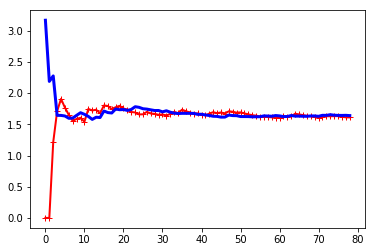

In [54]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

- 훈련 데이터에 대한 모델 성능은 그래프가 0에서 시작할때 하나 혹은 두 개의 샘플은 정확하게 맞추지만 샘플 갯수가 늘어감에 따라 노이즈도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해진다. 그래서 곡선이 어느정도 평편해질 때까지 오차가 계속 상승한다.
- 검증 데이터에 대한 모델의 성능은 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 크다. 
- 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다.
> - 하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워진다.
> - 모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없다. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야한다.

In [55]:
from sklearn.pipeline import Pipeline

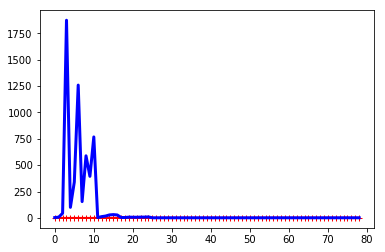

In [64]:
ploynomial_regression = Pipeline([('poly_features',
                                   PolynomialFeatures(degree=10,include_bias=False)),
                                 ('lin_reg',LinearRegression())])
plot_learning_curves(ploynomial_regression,X,y)

- 훈련 데이터의 오차가 선형 회귀 모델 보다 훨씬 낮다.
- 두 곡선 상의 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

## 별도
- 편향/분산 트레이드 오프

> - 1. 편향: 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것이다. 예를들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우이다. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다.

> - 2. 분산: 분산은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다. 자유가(주어진 조건하에 자유롭게 변할 수 있는 점수)가 높은 모델 (예를 들면 고차 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합 되는 경향이 있다.

> - 3. 줄일 수 없는 오차: 데이터 자체에 있는 노이즈 때문에 발생하는데 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 노이즈를 제거하는 것이다.(예를 들어 고장 난 센서 같은 데이터 소스를 고치거나 이상치를 감지해 제거)

- 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. 그래서 트레이드오프라 부른다.

## 4.5 규제가 있는 선형 모델 
- 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다.
- 자유도를 줄이면 데이터에 과대적합되기 더 어려워진다.
> - 예를들어 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.
- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다.

## 4.5.1 릿지 회귀
- 릿지 회귀는 규제가 추가된 선형 회귀 버젼이다.
> - 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력한다.
> - 규제항은 훈련하는 동안에만 비용 함수에 추가되고 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가
> - 훈련에 사용되는 비용 함수는 최적화를 위해 미분 가능해야 하기 때문에 비용 함수와 테스트에서 사용되는 성능 지표는 다르다.
- 하이퍼파라미터 α는 모델을 얼마나 많이 규제할지 조절한다. α = 0 이면 릿지 회귀는 선형회귀와 같아진다. α가 아주 크면 모든 가중치는 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.
- 편향 θ0는 규제되지 않는다.

![test](./img/릿지1.png)

![test](./img/릿지식.png)

- 완쪽 글프는 평범한 릿지 모델을 사용해 선형적인 예측을 만들었고 오른쪽 그래프는 다항회귀를 통해 먼저 데이터를 확장하고 스케일을 조정한 후 릿지 모델을 적용
- 위 그래프를 보면 α를 증가 시킬수록 직선에 가까워지는 것을 볼 수 있다. 값을 줄이면 모델의 분산은 줄지만 편향은 커지게 된다. 

![test](./img/정규방정식릿지.png)

In [58]:
from sklearn.linear_model import Ridge # 정규방정식을 사용한 릿지 회귀

In [65]:
ridge_reg = Ridge(alpha=1,solver='cholesky') # α = 1, solver: 숄래스키 행렬분해
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.93266789]])

In [66]:
# 확률적 경사 하강법
sgd_reg = SGDRegressor(max_iter=5,penalty='l2') # l2 규제 = 릿지
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([3.97642761])

## 2.5.2 라쏘 회귀
- 라쏘(Lasso) 회귀는 선형 회귀의 또 다른 규제된 버전이다.
- 릿지 회귀 처럼 비용 함수에 규제항을 더하지만 l2노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1노름을 사용

![test](./img/라쏘.png)

![test](./img/라쏘1.png)

- 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 점이다. (즉, 가중치가 0이 된다.)
> - 다시 말해 라쏘 회귀는 자동으로 특성을 선택하고 희소 모델(sparse model)을 만든다.
> - 즉, 0이 아닌 특성의 가중치가 적다.

In [67]:
from sklearn.linear_model import Lasso # 정규방정식에 의한 라쏘 회귀

In [68]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.88667718])

In [69]:
# 확률적 경사 하강법
sgd_reg = SGDRegressor(max_iter=5,penalty='l1') # l1 규제 = 라쏘
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([3.92568024])

## 4.5.3 엘라스틱넷
- 엘라스틱넷(Elastic Net)은 릿지 회귀와 라쏘 회귀를 절충한 모델이다.

![test](./img/엘라스틱.png)

- r = 0이면 엘라스팃넷은 릿지 회귀와 같고, r = 1 이면 라쏘 회귀와 같다
- 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 한다.
- 릿지가 기본이 되지만 셀제로 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다
> - 이들을 불필요한 특성의 가중치를 0으로 만들어준다.
> - 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으킴으로 엘라스틱넷을 선호
>> - 라쏘는 특성 수가 샘플 수 보다 많으면 최대 샘플 수 개의 특성을 선택한다.

In [70]:
from sklearn.linear_model import ElasticNet 

In [71]:
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.89048884])

## 4.6 로지스틱 회귀
- 로지스틱 회귀(또는 로짓 회귀)는 샘플이 특정 클래스에 속할 학률을 추정하는 데 널리 사용된다.
- 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측하고 아니면 클래스에 속하지 않는다고 예측한다.

## 4.6.1 확률 추정

![test](./img/로지스틱1.png)
- 로지스틱은함수는 0과 1사이의 값을 출력하는 시그모이드 함수이다.(즉, S자 형태이다)

![test](./img/로지스틱.png)

- 로지스틱 회귀 모델이 샘플 X가 양성클래스에 속할 확률 p^을 추정하면 이에 대한 예측 y^을 쉽게 구할 수 있다.

![test](./img/로지스틱2.png)

- t<0이면 σ(t) < 0.5 이고, t>=0이면 σ(t) >= 0.5 이므로 로지스틱 회귀 모델은 θTx가 양수일때 1이라고 예측하고, 음수일때 0이라고 예측한다.

## 4.6.2 훈련과 비용 함수
- 훈련의 목적은 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 θ를 찾는 것이다.

![test](./img/로지스틱3.png)

- 이 비용 함수는 t가 0에 가까워지면 -log(t)가 매우 커지므로 타당하다 할 수 있다.
- 그러므로 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것이다.
> - 반대의 경우도 마찬가지
- 반면에 t가 1에 가까우면 -log(t)는 0에 가까워진다. 따라서 기대한 대로 음성 샘플의 확률을 0에 가깝게 추정학나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워진다.


![test](./img/로지스틱4.png)

- 로그 손실함수라 부르며 안타깝게도 이 비용 함수의 최솟값을 계산하는 알려진 해(정규방정식과 같은)가 없다.
> - 하지만 이 비용 함수는 볼록 함수이므로 경사 하강법이 전역 최솟값을 찾는 것을 보장한다.
>> - 학습률이 너무 크지 않고 충분히 기다릴 시간이 있다면

![test](./img/로지스틱편도.png)

- 객 샘플에 대해 예측 오차를 계산하고 j번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 낸다.
- 모든 편도함수를 포함한 그래디언트 벡터를 만들면 배치 경사 하강법 알고리즘을 사용할 수 있다.

In [72]:
from sklearn import datasets

- Iris_Setisa(0),Iris_Versicolor(1),Iris_Virginica(3)
- feature: petal(꽃잎), sepal(꽃받침)

In [73]:
iris = datasets.load_iris()

In [74]:
list(iris.keys()) 

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [76]:
X = iris['data'][:,3:] # 꽃잎의 너비 (4번째 열 추출)
y = (iris['target'] == 2).astype(np.int) # Iris-Virginica

In [81]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [82]:
iris['target'] == 2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [91]:
from sklearn.linear_model import LogisticRegression
import os

In [84]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

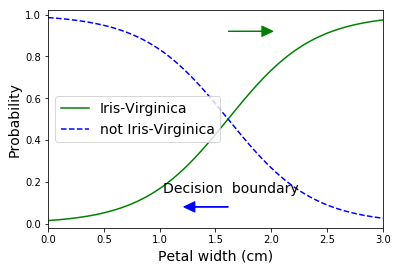

In [94]:
X_new = np.linspace(0,3,1000).reshape(-1,1) 
# 꽃의 너비가 0 ~ 3 / np.linspace(시작,끝,갯수).reshape(1000,1)
y_proba = log_reg.predict_proba(X_new)
# X_new 데이터셋의 값들을 예측
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot(X_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='not Iris-Virginica')

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

![test](./img/결정.png)

- Iris-Verginica의 꽃잎 너비는 1.4~2.5cm에 분포한다. 반면, 다른 붓꽃은 일반적으로 꽃잎 너비가 더 작아 0.1 ~ 1.8에 분포한다. 그래서 겹치는 부분이 있다.
> - 꽃잎 너비가 2cm이상인 꽃은 분류기가 Iris-Verginica라고 강하게 확신한다. 반면 1cm 아래면 아니라고 강하게 확신한다. 
> - 이 두 극단 사이에서는 분류가 확실하지 않지만 어쨋든 클래스를 예측하려고 하면 predict()메서드를 사용해서 가장 가능성이 높은 클래스를 반환할 것이다.
> - 그렇기 때문에 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어진다.
> - 꽃잎 너비가 1.6cm보다 크면 분류기는 양성을 아니면 음성을 예측할 것이다.

![test](./img/선형결정.png)

- 사이킷런의 LogisticeRegression 모델의 규제 강도를 조절하는 하이퍼파라미터는 alpha가 아니고 그 역수에 해당하는 C이다. C가 높을수록 모델의 규제는 줄어든다.

## 4.6.4 소프트맥스 회귀
- 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화 할 수 있는데 이를 소프트맥스 회귀(Softmax Regression)이라 한다.

![test](./img/소프트맥스.png)

- 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에대한 점수 Sk(x)를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정한다.

![test](./img/소프트맥스함수.png)

- 샘플 x에 대하 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 p^k를 추정할 수 있다.
> - K는 클래스 수 이다.
> - s(x)는 샘플 x에 대한 각 클래스의 점수를 담고 있는 벡터이다.
> - σ(S(x))k는 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률이다.
- 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택한다.
- 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측한다.(즉, 다중 클래스지 다중 출력이 아니다)
> - 상호 배타적인 클래스에서만 사용해야한다. 즉, 붓꽃/MNIST
-------------
- 모델이 어떻게 확률을 추정하고 예측을 만드는지 알았으므로 훈련 방법에 대해 살펴본다.
> - 모델이 타깃 클래스에 대해서는 높은 확률(그리고 다른 클래스에 대해서는 낮은 확률을)을 추정하도록 만드는 것이 목적이다.
> - 크로스 엔트로피 비용 함수를 최소화 하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합한다.

![test](./img/크로스엔트로피.png)

- 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다.
- 각 클래스에 대한 글디언트 벡터를 계산할 수 있으므로 비용 함수를 최소화하기 위한 파라미터 행렬 Θ를 찾기 위해 경사 하강법을 사용할 수 있다.

In [95]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [96]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [97]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
# multi_class 매개변수를 multinomial로 바꾸면 소프트맥스 회귀를 사용할 수 있다. 디폴트는 OvA
# 소프트맥스를 사용하려면 solver 매개변수에 lbfgs와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정
# 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 l2 규제가 적용
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
softmax_reg.predict([[5,2]])

array([2])

In [99]:
softmax_reg.predict_proba([[5,2]]) # 94.2%의 확률로 클래스 2라고 출력

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

![test](./img/소프트맥스회귀.png)

- 결정 경계를 배경색으로 구분하는데 클래스 사이의 결정 경계가 모두 선형이다.
> - 즉, 0.45인 직선은 45% 확률 경계를 나타낸다.
> - 이 모델이 추정 확률 50% 이하인 클래스를 예측 할 수 있다는 점을 주목하자